# ECH 60 Spring 2022: QUIZ 5

<font color='red'> Total 2.5+3+7=12.5 points</font>. 

Rename this file as lastname_firstname and upload to canvas in the correct ipynb format. Partial points will be awarded ONLY IF a reasonably accurate attempt has been made. 

You may consult your notes, lecture material, or tutorials. You must NOT consult any other sources. You should NOT seek help from anyone else for the duration of the quiz. And you should NOT share or discuss questions with anyone during or after the quiz. 

Acknowledge abiding by these rules by writing a single line of code to print your name:
<font color='green'> [-1 point if incomplete] </font>

In [2]:
print("Devin Fan")

Devin Fan


**PROBLEM 0:** First, run the following code cell to import modules. Copy and paste and run any familiar functions we have developed in past tutorials here if you need them for later problems.

In [3]:
import numpy as np
import numpy.linalg as la
import scipy.integrate as si
import matplotlib.pyplot as plt

**PROBLEM 1:**  <font color='red'> [Total 2.5 points] </font>

**1 (a):** The 'error function' (also called Gauss error function) frequently arises in probability, statistics, mass transfer, and fluid dynamics, and is defined as 

$$ {\rm erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-s^2} ds. $$

Develop a user-defined function `my_erf(x)` that takes in any positive number $x$ and returns the value of the error function at that point. 


In [20]:
def my_erf(x):
    x=np.linspace(0,x,100)
    y=np.exp(-x^2)
    F=2/np.sqrt(np.pi)*si.simps(x,y)
    return F

**1 (b):** Use this function to find the value of the error function at $x=1/4$.

In [23]:
my_erf(1/4)

**PROBLEM 2:** <font color='red'> [Total 3 points] </font>

A spherical room freshener pellet of radius $6.4\,{\rm mm}$ is initially saturated with a solute at a density $1.8 \,{\rm g/cm^3}$. The solute is slowly released to the surroundings, so the regions closer to the surface are depleted while the core remains at a relatively higher density. After some time, the density $\rho$ of solute at a radial distance $r$ from the pellet center is

$$\begin{matrix} 
{r~({\rm  mm})} & 0 & 0.8 & 1.2 & 1.4 & 2.0 & 3.0 & 3.4 & 3.6 & 4.0 & 5.0 & 5.5 & 6.4\\
{\rho~({\rm g/cm^3})}& 1.8 &  1.79 & 1.77 & 1.70 & 1.67 & 1.56 & 1.49 & 1.45 & 1.23 & 1.18 & 1.15 & 1.13
\end{matrix}$$

The total mass of solute remaining within the pellet can be found by integrating the density across the entire volume:

$$ m = \int_V \rho \,dV. $$

Assume that solute distribution only depends on radial position, so that $dV = 4\pi r^2 dr$. Find $m$ in grams.



In [46]:
r=np.array([0,.8,1.2,1.4,2.0,3,3.4,3.6,4.0,5,5.5,6.4])
r=r*10
p=np.array([1.8,1.79,1.77,1.7,1.67,1.56,1.49,1.45,1.23,1.18,1.15,1.13])

dv=4*np.pi*r**2
m=si.simps(p,dv)
print(m)

67649.4871681551


**PROBLEM 3:** <font color='red'> [Total 7 points] </font>

The Van der Pol oscillator is a nonlinear extension of the simple harmonic oscillator, and shows up in the modeling of electrical circuits, activity of neurons, and the vibration of vocal chords in our throats:

$$ \frac{d^2 x}{dt^2} - \mu (1-x^2) \frac{dx}{dt} + x =0. $$

**(3a)** Convert the Van der Pol oscillator to a coupled system of first-order differential equations and numerically solve it using any method for time $t=0$ to $t=40$ in steps of $0.05$. Plot your solution. Use $\mu=-0.5$ and initial conditions 

$$x(t=0)=0,\qquad \left.\frac{dx}{dt}\right|_{t=0}=2.$$




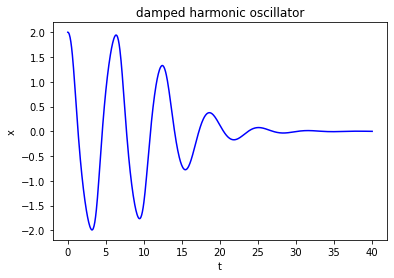

In [68]:
m=-0.5

def fx(x,v,t): return v
def fv(x,v,t): return -x+(m*(1-x**2)*v)

# time range
h=0.05
t=np.arange(0,40+h,h)

# initialize solutions
x=np.zeros(t.shape)
v=np.zeros(t.shape)

# initial conditon at t=0
x[0]=2
v[0]=0

for i in range(len(t)-1):
    
    # RK4 substeps
    kx1=fx(x[i],v[i],t[i])
    kv1=fv(x[i],v[i],t[i])
    
    kx2=fx(x[i]+h*kx1/2,v[i]+h*kv1/2,t[i]+h/2)
    kv2=fv(x[i]+h*kx1/2,v[i]+h*kv1/2,t[i]+h/2)
    
    kx3=fx(x[i]+h*kx2/2,v[i]+h*kv2/2,t[i]+h/2)
    kv3=fv(x[i]+h*kx2/2,v[i]+h*kv2/2,t[i]+h/2)
    
    kx4=fx(x[i]+h*kx3,v[i]+h*kv3,t[i])
    kv4=fv(x[i]+h*kx3,v[i]+h*kv3,t[i])
    
    # weighted average
    kx=(kx1+2*kx2+2*kx3+kx4)/6
    kv=(kv1+2*kv2+2*kv3+kv4)/6
    
    # jump with modified average slope
    x[i+1]=x[i]+h*kx
    v[i+1]=v[i]+h*kv

plt.plot(t,x,'b-')
plt.title('damped harmonic oscillator')
plt.ylabel('x')
plt.xlabel('t')
plt.show()

**(3b)** Now solve and plot using $\mu=5$ and initial conditions 

$$x(t=0)=2,\qquad \left.\frac{dx}{dt}\right|_{t=0}=0.$$



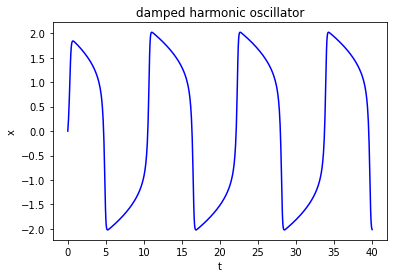

In [70]:
m=5

def fx(x,v,t): return v
def fv(x,v,t): return -x+(m*(1-x**2)*v)

# time range
h=0.05
t=np.arange(0,40+h,h)

# initialize solutions
x=np.zeros(t.shape)
v=np.zeros(t.shape)

# initial conditon at t=0
x[0]=0
v[0]=2

for i in range(len(t)-1):
    
    # RK4 substeps
    kx1=fx(x[i],v[i],t[i])
    kv1=fv(x[i],v[i],t[i])
    
    kx2=fx(x[i]+h*kx1/2,v[i]+h*kv1/2,t[i]+h/2)
    kv2=fv(x[i]+h*kx1/2,v[i]+h*kv1/2,t[i]+h/2)
    
    kx3=fx(x[i]+h*kx2/2,v[i]+h*kv2/2,t[i]+h/2)
    kv3=fv(x[i]+h*kx2/2,v[i]+h*kv2/2,t[i]+h/2)
    
    kx4=fx(x[i]+h*kx3,v[i]+h*kv3,t[i])
    kv4=fv(x[i]+h*kx3,v[i]+h*kv3,t[i])
    
    # weighted average
    kx=(kx1+2*kx2+2*kx3+kx4)/6
    kv=(kv1+2*kv2+2*kv3+kv4)/6
    
    # jump with modified average slope
    x[i+1]=x[i]+h*kx
    v[i+1]=v[i]+h*kv

w=plt.plot(t,x,'b-')
plt.title('damped harmonic oscillator')
plt.ylabel('x')
plt.xlabel('t')
plt.show()

**(3c)** A common way to represent the dynamics of oscillators is in the form of a 'phase portrait'. This is a plot with $x$ as the horizontal axis and $\frac{dx}{dt}$ as the vertical axis. Display the phase portrait of your solution from problem (3b).



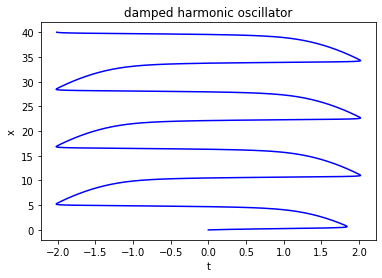

In [73]:
m=5

def fx(x,v,t): return v
def fv(x,v,t): return -x+(m*(1-x**2)*v)

# time range
h=0.05
t=np.arange(0,40+h,h)

# initialize solutions
x=np.zeros(t.shape)
v=np.zeros(t.shape)

# initial conditon at t=0
x[0]=0
v[0]=2

for i in range(len(t)-1):
    
    # RK4 substeps
    kx1=fx(x[i],v[i],t[i])
    kv1=fv(x[i],v[i],t[i])
    
    kx2=fx(x[i]+h*kx1/2,v[i]+h*kv1/2,t[i]+h/2)
    kv2=fv(x[i]+h*kx1/2,v[i]+h*kv1/2,t[i]+h/2)
    
    kx3=fx(x[i]+h*kx2/2,v[i]+h*kv2/2,t[i]+h/2)
    kv3=fv(x[i]+h*kx2/2,v[i]+h*kv2/2,t[i]+h/2)
    
    kx4=fx(x[i]+h*kx3,v[i]+h*kv3,t[i])
    kv4=fv(x[i]+h*kx3,v[i]+h*kv3,t[i])
    
    # weighted average
    kx=(kx1+2*kx2+2*kx3+kx4)/6
    kv=(kv1+2*kv2+2*kv3+kv4)/6
    
    # jump with modified average slope
    x[i+1]=x[i]+h*kx
    v[i+1]=v[i]+h*kv

w=plt.plot(x,t,'b-')
plt.title('damped harmonic oscillator')
plt.ylabel('x')
plt.xlabel('t')
plt.show()

*Rough work/test cells (won't be graded):*